Studi kasus regresi non linear china GDP

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [61]:
path='china_gdp.csv'
df = pd.read_csv(path)
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


Ploting dataset 

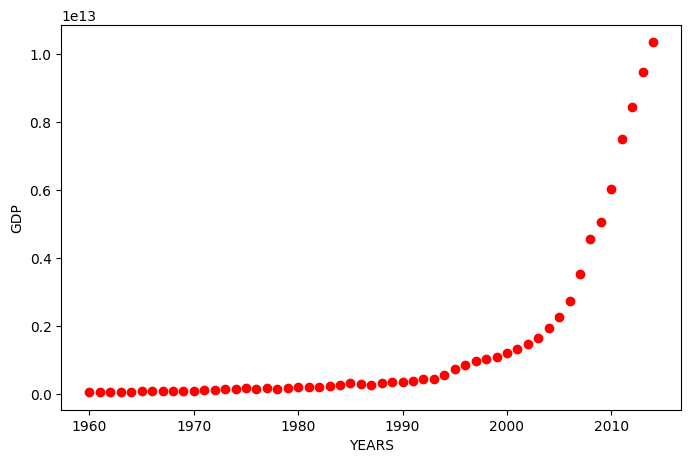

In [62]:
plt.figure(figsize=(8,5))
x_data,y_data =(df["Year"].values,df["Value"].values)
plt.plot(x_data,y_data,"ro")
plt.ylabel("GDP")
plt.xlabel("YEARS")
plt.show()

Memilih model yang cocok dengan dataset(?)

Membuat Model (Sigmoidal/Logistic)

In [63]:
# membuat model
def model_sigmoid(x,beta_1,beta_2):
    return 1/(1+np.exp(-beta_1* (x-beta_2)))

Testing model

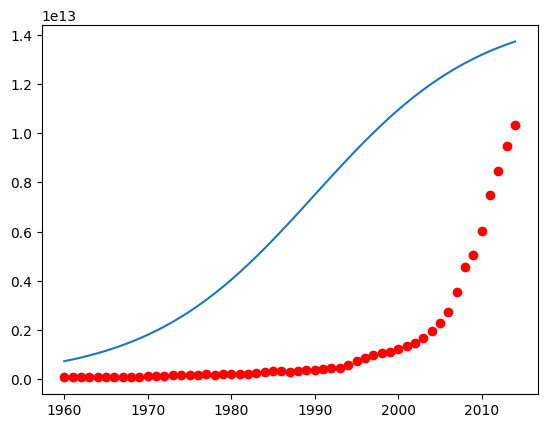

In [64]:
beta_1 = 0.1
beta_2 = 1990.0

y_prediksi = model_sigmoid(x_data,beta_1,beta_2)

plt.plot(x_data,y_data,"ro")
plt.plot(x_data,y_prediksi*15000000000000.)

Normalisasi data

In [65]:

x_data_scaled = (x_data-min(x_data))/(max(x_data)-min(x_data))
y_data_scaled = (y_data-min(y_data))/(max(y_data)-min(y_data))



Menentukan nilai beta_1 dan beta_2

In [66]:
from scipy.optimize import curve_fit
popt,pcov= curve_fit(model_sigmoid,x_data_scaled,y_data_scaled)

print(f"beta_1 {popt[0]}")
print(f"beta_2 {popt[1]}")


beta_1 18.869350330725496
beta_2 0.8966631946086254


hitung y prediksi

In [67]:
y_prediksi = model_sigmoid(x_data_scaled, *popt)




Plot Hasil Regresi Non Linier

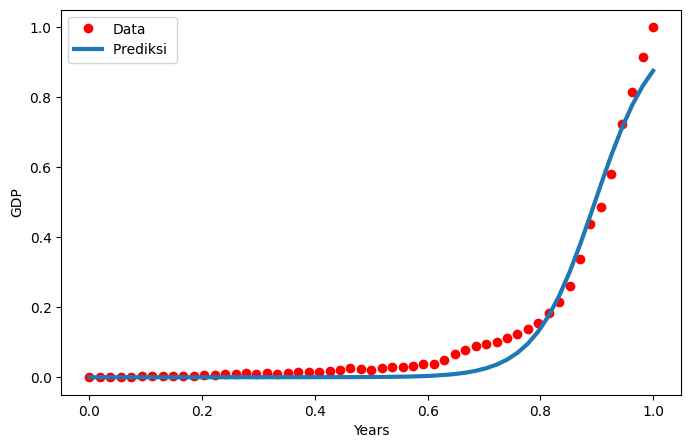

In [68]:

plt.figure(figsize=(8,5))
plt.plot(x_data_scaled,y_data_scaled,'ro', label='Data')
plt.plot(x_data_scaled,y_prediksi,linewidth=3.0,label= 'Prediksi ')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Years')
plt.show()

Tambahkan evaluasi model dengan menghitung nilai MAE, MSE, RMSE

In [87]:
# menghitung MAE, MSE, RMSE
mae = np.mean(np.absolute(y_data - y_prediksi))
mse = np.mean((y_data - y_prediksi)**2)
rmse = np.sqrt(mse)

print("Mean Absolute Error = " + str(round(mae,4)))
print("Mean Squared Error = " + str(round(mse,4)))
print("Root Mean Squared Error = " + str(round(rmse,4)))

Mean Absolute Error = 1437041815987.3792
Mean Squared Error = 8.201868308557405e+24
Root Mean Squared Error = 2863890414900.229


Tambahkan grafik yang menjukkan hubungan antara "Year" dan "GDP" dengan nilai yang sebenarnya (tidak dinormalisasi)

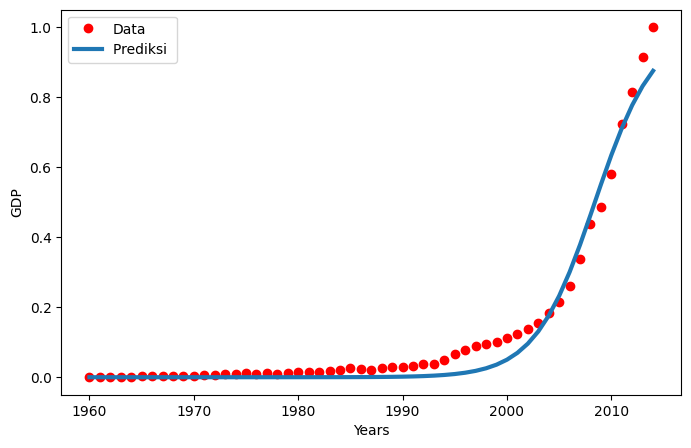

In [69]:


plt.figure(figsize=(8,5))
plt.plot(x_data,y_data_scaled,'ro', label='Data')
plt.plot(x_data,y_prediksi,linewidth=3.0,label= 'Prediksi ')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Years')
plt.show()

Tambahkan grafik yang menunjukkan prediksi GDP untuk tahun 2015 - 2030 menggunakan nilai yang sebenarnya (tidak dinormalisasi)

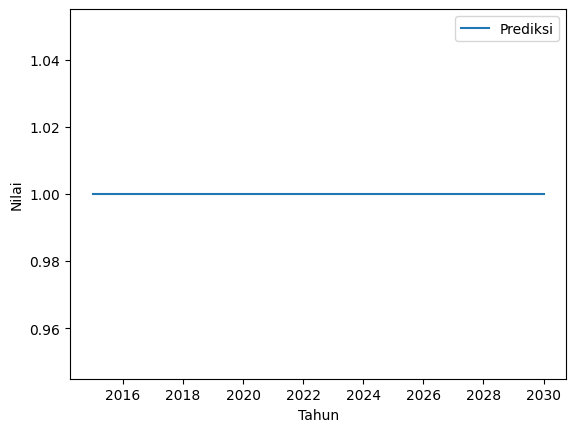

In [86]:

def sigmoid(x, a, b, c):
    y = c / (1 + a * np.exp(-b*x))
    return y

x = np.array(x_data)
y = np.array(y_data)

popt, pcov = curve_fit(sigmoid, x, y)

a = popt[0]
b = popt[1]
c = popt[2]

# Menggunakan parameter a, b, c untuk memprediksi nilai dari tahun 2015 hingga 2030
x_pred = np.array(range(2015, 2031))
y_pred = sigmoid(x_pred, a, b, c)

# Plot data asli
# plt.plot(x, y, 'o', label='Data Asli')

# Plot prediksi
plt.plot(x_pred, y_pred, '-', label='Prediksi')

plt.xlabel('Tahun')
plt.ylabel('Nilai')
plt.legend()
plt.show()


